In [117]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

# to display all columns
pd.set_option("display.max_columns",None)

In [118]:
TARGET = "Outcome"

In [119]:
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.head(3)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [120]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


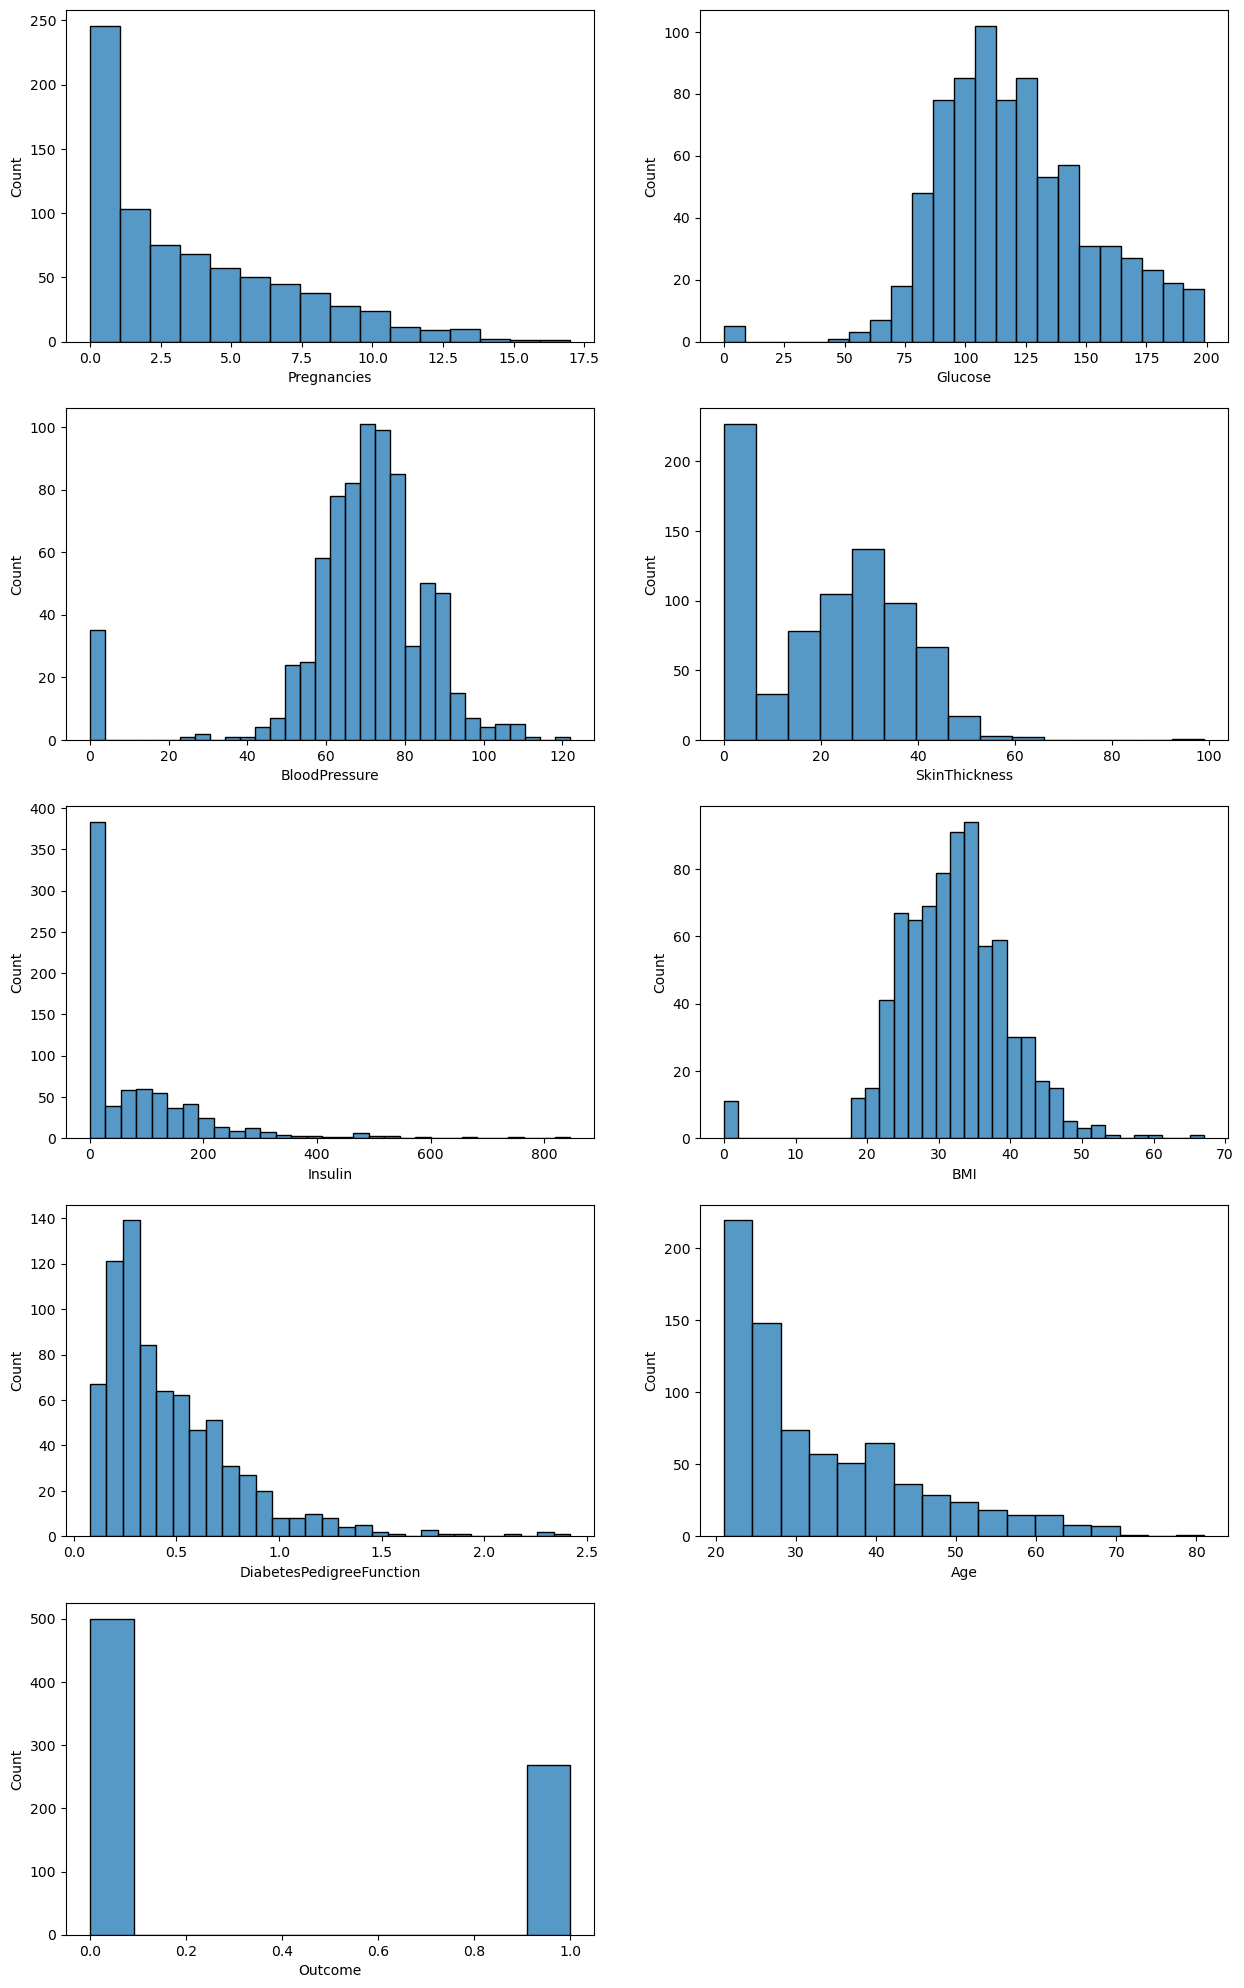

In [122]:
plt.figure(figsize=(15,25))
for i in range(len(df.columns)):
    plt.subplot(521+i)
    sns.histplot(df.iloc[:,i])
plt.show()

In [123]:
# fill with median
median_BloodPressure = df['BloodPressure'].median()
df['BloodPressure'] = df['BloodPressure'].replace(0, median_BloodPressure)

median_BMI = df[TARGET].median()
df['BMI'] = df[TARGET].replace(0, median_BMI)

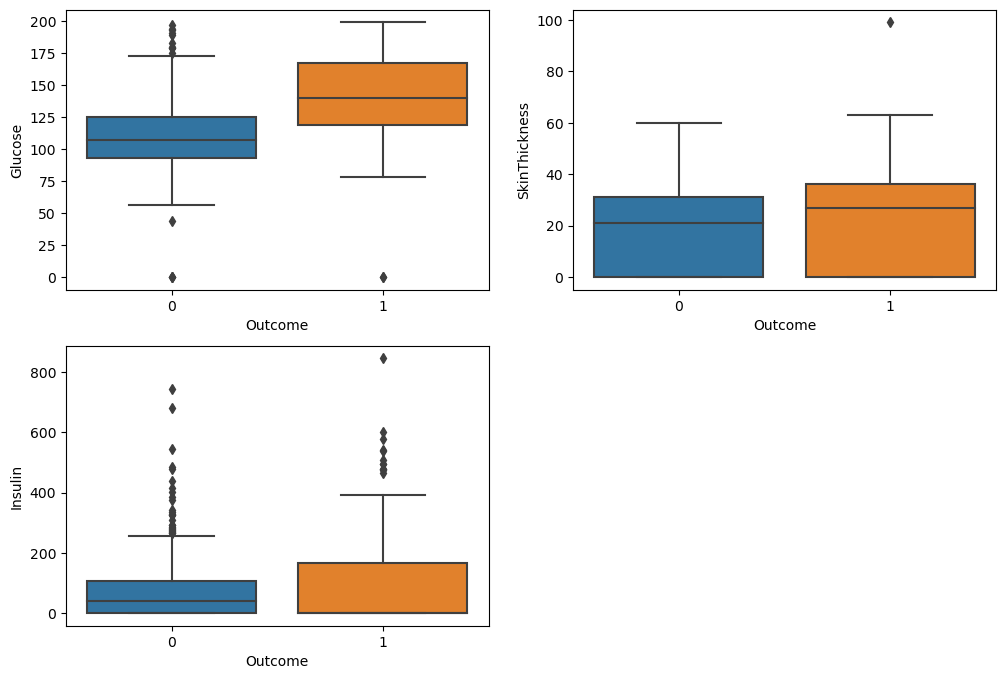

In [124]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.boxplot(x=df[TARGET],y=df["Glucose"])

plt.subplot(222)
sns.boxplot(x=df[TARGET],y=df["SkinThickness"])

plt.subplot(223)
sns.boxplot(x=df[TARGET],y=df["Insulin"])
plt.show()

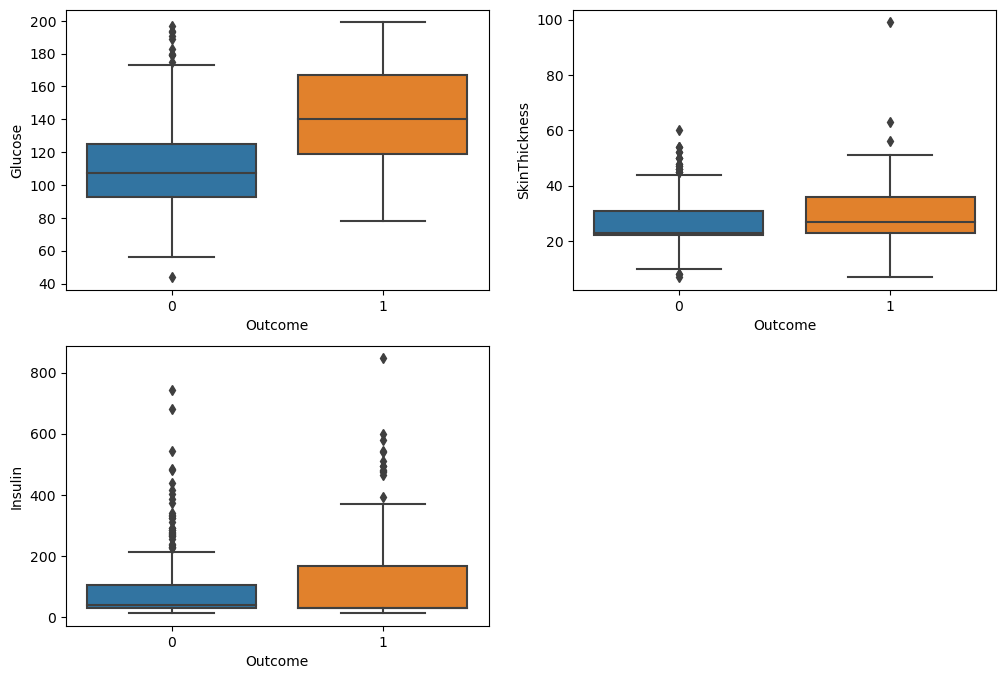

In [125]:
tmp_df = df.copy()

median_Glucose = tmp_df['Glucose'].median()
median_SkinThickness = tmp_df['SkinThickness'].median()
median_Insulin = tmp_df['Insulin'].median()
tmp_df['Glucose'] = tmp_df['Glucose'].replace(0, median_Glucose)
tmp_df['SkinThickness'] = tmp_df['SkinThickness'].replace(0, median_SkinThickness)
tmp_df['Insulin'] = tmp_df['Insulin'].replace(0, median_Insulin)

plt.figure(figsize=(12,8))
plt.subplot(221)
sns.boxplot(x=tmp_df[TARGET],y=tmp_df["Glucose"])

plt.subplot(222)
sns.boxplot(x=tmp_df[TARGET],y=tmp_df["SkinThickness"])

plt.subplot(223)
sns.boxplot(x=tmp_df[TARGET],y=tmp_df["Insulin"])
plt.show()

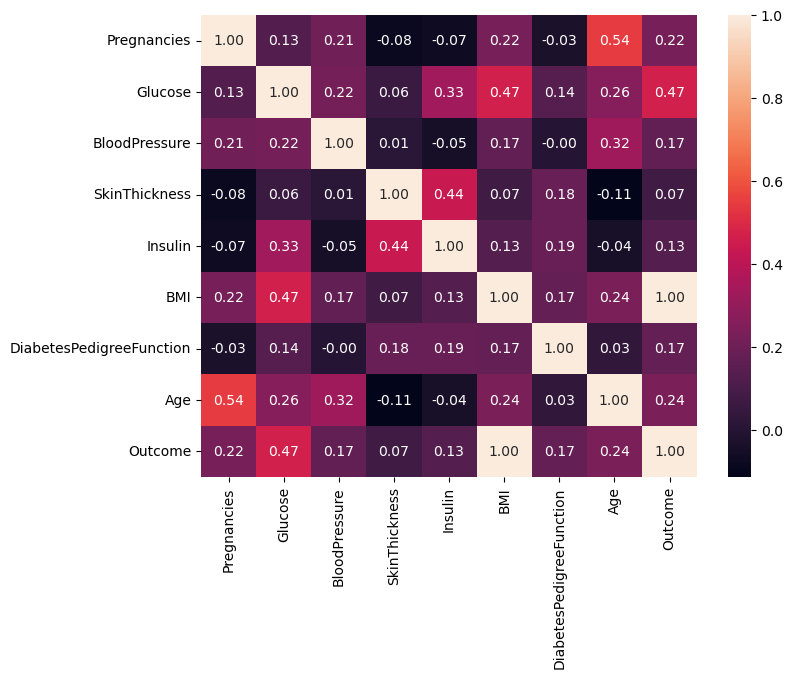

In [126]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [127]:
train_df = tmp_df.iloc[:700,:]
test_df = tmp_df.iloc[700:,:]
X_train = train_df.drop(TARGET,axis=1)
y_train = train_df[TARGET]
X_test = test_df.drop(TARGET,axis=1)
y_test = test_df[TARGET]

In [130]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [129]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

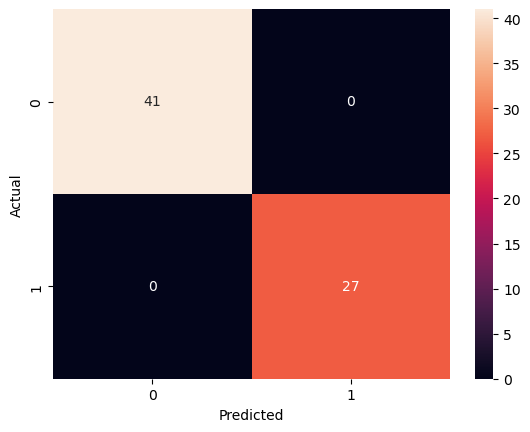

In [131]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [132]:
coefficients = model.coef_[0]
intercept = model.intercept_[0]

coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]})
coef_df = pd.concat([coef_df, intercept_df], ignore_index=True)

print("Coefficients:")
display(coef_df)

Coefficients:


,Feature,Coefficient
0,Pregnancies,0.056539
1,Glucose,0.010723
2,BloodPressure,-0.027060
3,SkinThickness,-0.004333
4,Insulin,0.000536
5,BMI,7.426618
6,DiabetesPedigreeFunction,-0.651795
7,Age,-0.002965
8,Intercept,-3.090564


In [133]:
import pickle
filename = 'diabet.sav'
pickle.dump(model,open(filename,'wb'))